In [1]:
import os
import torch
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision.io import read_image
from torch.optim.lr_scheduler import StepLR

from model import *
from load_data import *

m = torch.load("models/model_1.4.pt")

print("Number of parameters:", sum(p.numel() for p in m.parameters()))
m = m.cuda()

Number of parameters: 17475912


In [2]:
img1 = load_image("images/1.jpg")
img2 = load_image("images/2.jpg")
img1.shape, img2.shape

(torch.Size([1, 3, 128, 128]), torch.Size([1, 3, 128, 128]))

In [3]:
def generate_latent(inp):
    fe = m.fe(inp)
    latent = m.to_latent(fe)
    return latent
def restore_from_latent(latent):
    features_decoded = m.to_features(latent)
    pixels = m.to_pixels(features_decoded)
    return pixels, features_decoded

latent1 = generate_latent(img1.cuda())
latent2 = generate_latent(img2.cuda())

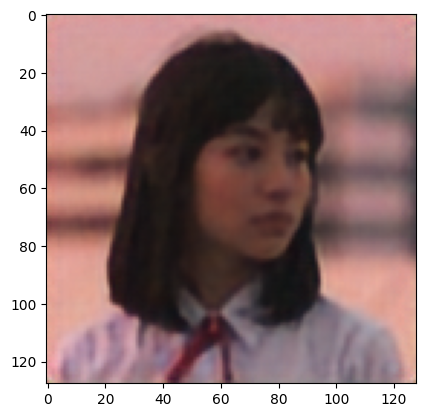

In [4]:
latent = latent1
img, fd = restore_from_latent(latent)
plt.imshow(img[0].permute(1,2,0).cpu().detach().numpy())

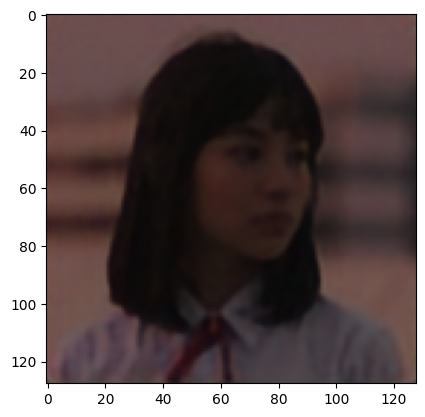

In [5]:
latent = latent1 * 0.5
img, fd = restore_from_latent(latent)
plt.imshow(img[0].permute(1,2,0).cpu().detach().numpy())

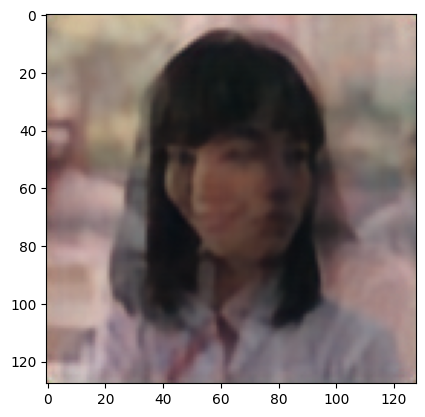

In [6]:
latent = (latent1 + latent2)/2
img, fd = restore_from_latent(latent)
plt.imshow(img[0].permute(1,2,0).cpu().detach().numpy())

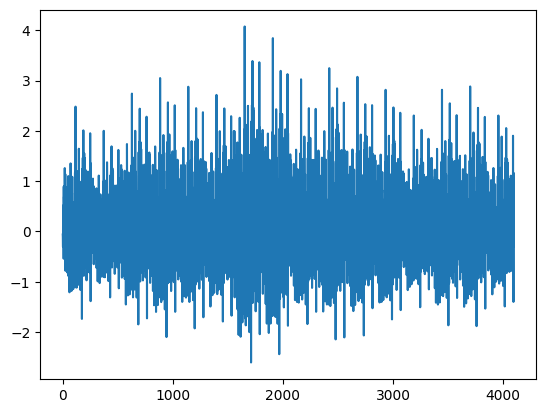

In [7]:
plt.plot(range(4096), latent1[0].cpu().detach().numpy(), "-")

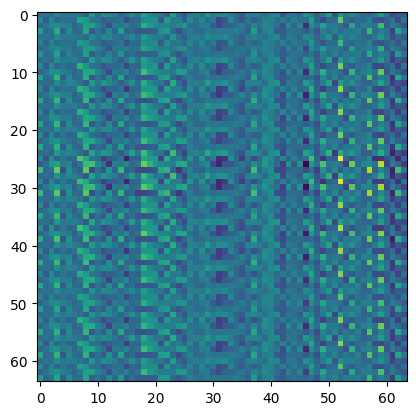

In [8]:
plt.imshow(latent1.reshape(64,64).cpu().detach().numpy())